Import necessary Python libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Create the data frame

In [15]:
df = pd.read_csv("Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [16]:
# convert the data type of the rate column into float (extract the rate)
def handleRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [17]:
df.info()
# there is no null value in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Obtain a summary of the dataframe

Text(0.5, 0, 'Type of restaurants')

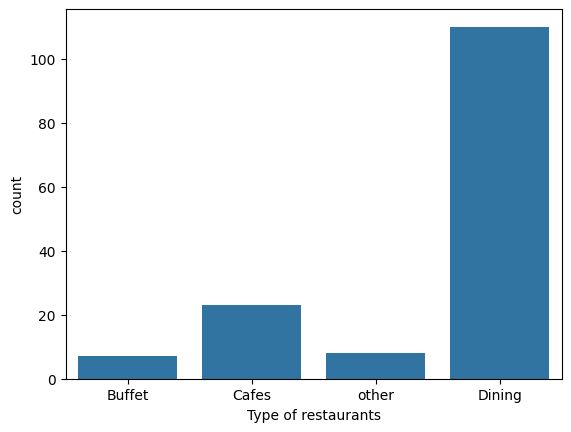

In [35]:
sb.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurants")
# most restaurants are in the dining category

Text(0, 0.5, 'Votes')

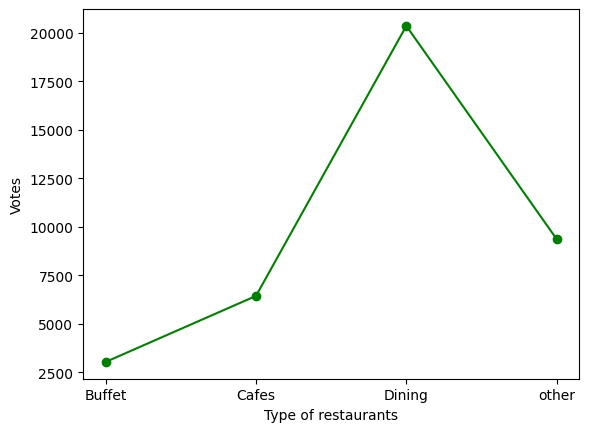

In [36]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurants')
plt.ylabel('Votes')
# dining restaurants are preferred by most number of individuals

In [24]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
print(f"Restaurant(s) with the maximum votes: {restaurant_with_max_votes}")

Restaurant(s) with the maximum votes: 38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

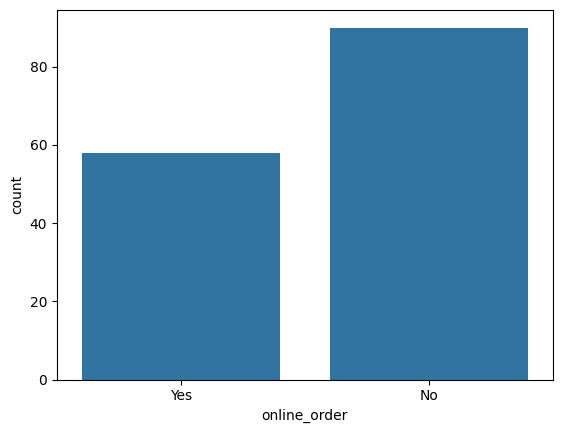

In [26]:
sb.countplot(x=df['online_order'])
# The majority of the restaurants do not accept online orders

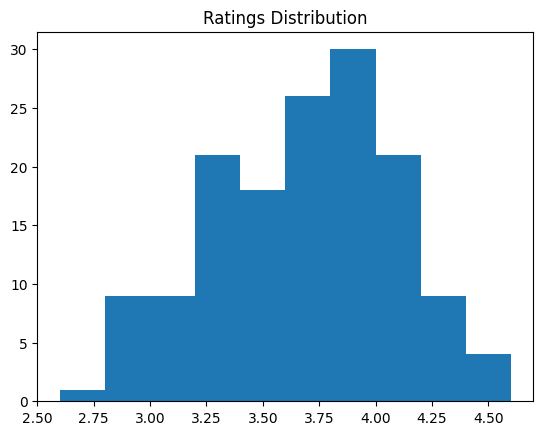

In [29]:
plt.hist(df['rate'])
plt.title("Ratings Distribution")
plt.show()
# The majority of the restaurants receive ratings ranging from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

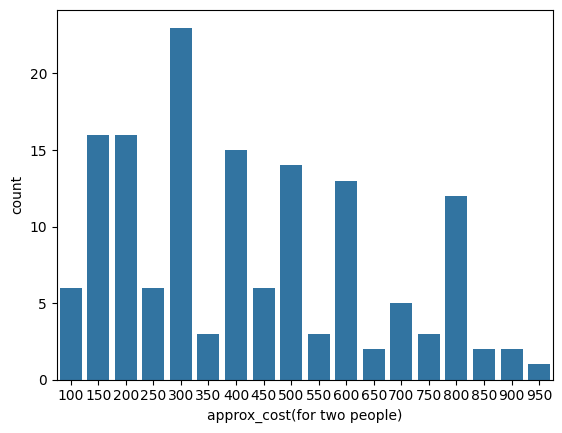

In [32]:
sb.countplot(x=df['approx_cost(for two people)'])
# The majority couples prefer restaurants with an approximate cost of 300

<Axes: xlabel='online_order', ylabel='rate'>

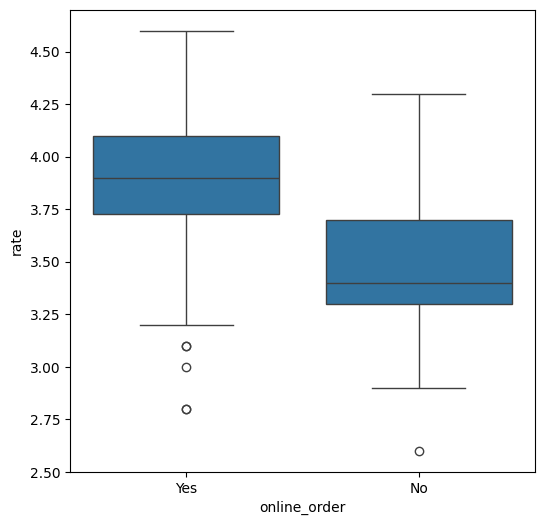

In [34]:
plt.figure(figsize=(6,6))
sb.boxplot(x='online_order', y='rate', data=df)
# offline orders receive lower ratings compared with online orders

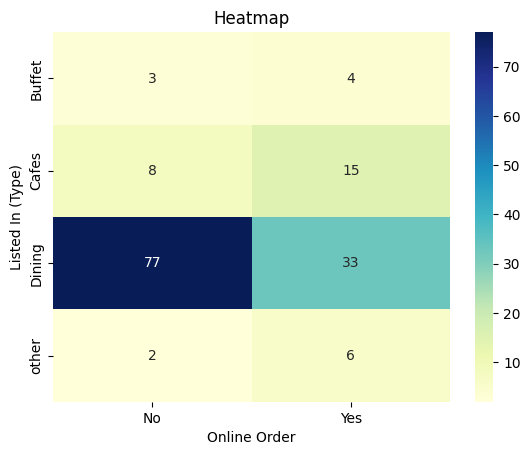

In [40]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
sb.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
# Dining restaurants primarily accept offline orders
# Cafes primarily receive online orders